[[이유한님] 캐글 코리아 캐글 스터디 커널 커리큘럼](https://kaggle-kr.tistory.com/32)

[1st level. Costa Rican Household Poverty Level Prediction](https://www.kaggle.com/c/costa-rican-household-poverty-prediction)  
'#'은 wonder1ng 각주  
표기가 없거나 '##~'은 원본 각주(혹은 코드)

# [A Complete Introduction and Walkthrough](https://www.kaggle.com/code/willkoehrsen/a-complete-introduction-and-walkthrough/notebook)

## Costa Rican Household Poverty Level Prediction
Welcome to another Kaggle challenge! The objective of the Costa Rican Household Poverty Level Prediction contest is to develop a machine learning model that can predict the poverty level of households using both individual and household characteristics. This "data science for good" project offers the opportunity to put our skills towards a task more beneficial to society than getting people to click on ads!  
  
In this notebook, we will walk through a complete machine learning solution: first, get introduced to the problem, then perform a thorough Exploratory Data Analysis of the dataset, work on feature engineering, try out multiple machine learning models, select a model, work to optimize the model, and finally, inspect the outputs of the model and draw conclusions. __While this notebook may not get us to the top of the leaderboard, it is meant to be used as a teaching tool to give you a solid foundation to build on for future machine learning projects. Kaggle projects can teach us a lot about machine learning, but several of the strategies used to get to the very top of the leaderboard are not best practices, so here we'll stick to building a very good - although not quite first place - machine learning solution. While Kaggle projects are competitions, I think they are best described as "a machine learning education" disguised as a contest!"  
  
If you are looking to follow-up on this work, I have additional work including [a kernel on using Automated Feature Engineering](https://www.kaggle.com/code/willkoehrsen/featuretools-for-good/notebook) with [Featuretools](https://featuretools.alteryx.com/en/stable/#minute-quick-start) for this problem (with slightly higher leaderboard score). (If you enjoy my writing style and explanations, I write for [Towards Data Science](https://williamkoehrsen.medium.com/))  
  
### Problem and Data Explanation
The data for this competition is provided in two files: train.csv and test.csv. The training set has 9557 rows and 143 columns while the testing set has 23856 rows and 142 columns. Each row represents __one individual__ and each column is a __feature, either unique to the individual, or for the household of the individual.__ The training set has one additional column, Target, which represents the poverty level on a 1-4 scale and is the label for the competition. A value of 1 is the most extreme poverty.  
  
This is a __supervised multi-class classification machine learning problem:__  
  
- __Supervised:__ provided with the labels for the training data  
- __Multi-class classification:__ Labels are discrete values with 4 classes  
  
### Objective
The objective is to predict poverty on a __household level__. We are given data on the individual level with each individual having unique features but also information about their household. In order to create a dataset for the task, we'll have to perform some aggregations of the individual data for each household. Moreover, we have to make a prediction for every individual in the test set, but "ONLY the heads of household are used in scoring" which means we want to predict poverty on a household basis.

__Important note: while all members of a household should have the same label in the training data, there are errors where individuals in the same household have different labels. In these cases, we are told to use the label for the head of each household, which can be identified by the rows where `parentesco1 == 1.0`.__ We will cover how to correct this in the notebook (for more info take a look at the [competition main discussion](https://www.kaggle.com/c/costa-rican-household-poverty-prediction/discussion/61403)).

The `Target` values represent poverty levels as follows:

`1 = extreme poverty`  
`2 = moderate poverty`  
`3 = vulnerable households`  
`4 = non vulnerable households`
  
The explanations for all 143 columns can be found in the [competition documentation](https://www.kaggle.com/c/costa-rican-household-poverty-prediction/data), but a few to note are below:

- __Id:__ a unique identifier for each individual, this should not be a feature that we use!
- __idhogar:__ a unique identifier for each household. This variable is not a feature, but will be used to group individuals by household as all individuals in a household will have the same identifier.
- __parentesco1:__ indicates if this person is the head of the household.
- __Target:__ the label, which should be equal for all members in a household
  
When we make a model, we'll train on a household basis with the label for each household the poverty level of the head of household. The raw data contains a mix of both household and individual characteristics and for the individual data, we will have to find a way to aggregate this for each household. Some of the individuals belong to a household with no head of household which means that unfortunately we can't use this data for training. These issues with the data are completely typical of __real-world__ data and hence this problem is great preparation for the datasets you'll encounter in a data science job!  
  
### Metric
Ultimately we want to build a machine learning model that can predict the integer poverty level of a household. Our predictions will be assessed by the __Macro F1 Score.__ You may be familiar with the standard F1 score for binary classification problems which is the harmonic mean of precision and recall:  
  
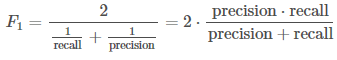
  
For mutli-class problems, we have to average the F1 scores for each class. The macro F1 score averages the F1 score for each class without taking into account label imbalances.  
  
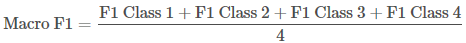
   
In other words, the number of occurrences of each label does not figure into the calculation when using macro (while it does when using the "weighted" score). (For more information on the differences, look at the [Scikit-Learn Documention for F1 Score](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.f1_score.html#sklearn.metrics.f1_score) or this [Stack Exchange question and answers](https://datascience.stackexchange.com/questions/15989/micro-average-vs-macro-average-performance-in-a-multiclass-classification-settin). If we want to assess our performance, we can use the code:  
`from sklearn.metrics import f1_score`
`f1_score(y_true, y_predicted, average = 'macro')`
  
For this problem, the labels are imbalanced, which makes it a little strange to use macro averaging for the evaluation metric, but that's a decision made by the organizers and not something we can change! In your own work, you want to be aware of label imbalances and choose a metric accordingly.
  
### Roadmap
The end objective is a machine learning model that can predict the poverty level of a household. However, before we get carried away with modeling, it's important to understand the problem and data. Also, we want to evaluate numerous models before choosing one as the "best" and after building a model, we want to investigate the predictions. Our roadmap is therefore as follows:  
  
1. Understand the problem (we're almost there already)
2. Exploratory Data Analysis
3. Feature engineering to create a dataset for machine learning
4. Compare several baseline machine learning models
5. Try more complex machine learning models
6. Optimize the selected model
7. Investigate model predictions in context of problem
8. Draw conclusions and lay out next steps
  
The steps laid out above are iterative meaning that while we will go through them one at a time, we might go back to an earlier step and revisit some of our decisions. In general, data science is a non-linear pracice where we are constantly evaluating our past decisions and making improvements. In particular, feature engineering, modeling, and optimization are steps that we often repeat because we never know if we got them right the first time!  
  
## DeepL 번역
또 다른 Kaggle 챌린지에 오신 것을 환영합니다! 코스타리카 가구 빈곤 수준 예측 콘테스트의 목표는 개인 및 가구 특성을 모두 사용하여 가구의 빈곤 수준을 예측할 수 있는 머신 러닝 모델을 개발하는 것입니다. 이 '선한 데이터 과학' 프로젝트는 사람들이 광고를 클릭하게 하는 것보다 사회에 더 유익한 일에 우리의 기술을 투입할 수 있는 기회를 제공합니다!  
  
이 노트북에서는 먼저 문제를 소개하고, 데이터 세트에 대한 철저한 탐색적 데이터 분석을 수행하고, 기능 엔지니어링 작업을 수행하고, 여러 머신러닝 모델을 시험해보고, 모델을 선택하고, 모델을 최적화하는 작업을 수행하고, 마지막으로 모델의 결과물을 검사하고 결론을 도출하는 등 완전한 머신러닝 솔루션의 과정을 안내합니다. 이 노트북으로 순위표의 정상에 오르지는 못하겠지만, 향후 머신 러닝 프로젝트를 위해 탄탄한 기초를 다질 수 있는 교육 도구로 사용할 수 있습니다. Kaggle 프로젝트를 통해 머신 러닝에 대해 많은 것을 배울 수 있지만, 리더보드의 최상위권에 오르는 데 사용된 몇 가지 전략은 모범 사례가 아니므로 여기서는 1등은 아니지만 매우 우수한 머신 러닝 솔루션을 구축하는 데 집중하겠습니다. Kaggle 프로젝트는 경연 대회이긴 하지만, 경연 대회로 위장한 '머신 러닝 교육'이라고 표현하는 것이 가장 적절하다고 생각합니다!"  
  
이 작업에 대한 후속 작업을 원하신다면, 이 문제에 대한 [자동화된 피처 엔지니어링 사용에 대한 커널](https://www.kaggle.com/code/willkoehrsen/featuretools-for-good/notebook)과 [Featuretools](https://featuretools.alteryx.com/en/stable/#minute-quick-start)를 포함한 추가 작업이 있습니다(리더보드 점수가 약간 더 높습니다). (제 글쓰기 스타일과 설명이 마음에 드신다면, [Towards Data Science](https://williamkoehrsen.medium.com/)에 글을 쓰기도 합니다).  
  
### 문제 및 데이터 설명
이 대회의 데이터는 train.csv와 test.csv의 두 가지 파일로 제공됩니다. 훈련 집합은 9557개의 행과 143개의 열로 구성되어 있고, 테스트 집합은 23856개의 행과 142개의 열로 구성되어 있습니다. 각 행은 __한 개인을__ 나타내고 각 열은 개인에게 고유하거나 개인의 가구에 대한 __특징을__ 나타냅니다. 훈련 집합에는 빈곤 수준을 1-4 척도로 나타내며 경쟁에 대한 레이블인 Target이라는 열이 하나 더 있습니다. 값이 1이면 가장 극심한 빈곤입니다.  
  
이것은 __다중 클래스 분류 머신 러닝 지도 학습 문제입니다:__  
  
- __지도 학습:__ 학습 데이터와 레이블이 함께 제공
- __다중 클래스 분류:__ 레이블은 4개의 클래스가 있는 불연속형 값입니다.
  
### 목표
목표는 __가구 수준에서__ 빈곤을 예측하는 것입니다. 각 개인의 고유한 특징과 가구에 대한 정보가 포함된 개인 수준의 데이터가 주어집니다. 이 작업을 위한 데이터 집합을 만들려면 각 가구에 대한 개별 데이터의 일부 집계를 수행해야 합니다. 또한 테스트 세트의 모든 개인에 대해 예측을 수행해야 하지만 "가구주만 채점에 사용"하므로 가구 단위로 빈곤을 예측하고자 합니다.

__중요 참고 사항: 한 가구의 모든 구성원이 훈련 데이터에서 동일한 레이블을 가져야 하지만, 같은 가구의 개인이 다른 레이블을 갖는 오류가 발생할 수 있습니다. 이러한 경우 각 가구의 가장에 대한 레이블을 사용하라는 메시지가 표시되며, 이는 `parentesco1 == 1.0`인 행으로 식별할 수 있습니다.__ 노트북에서 이 문제를 해결하는 방법을 다룰 것입니다(자세한 내용은 [대회 메인 토론](https://www.kaggle.com/c/costa-rican-household-poverty-prediction/discussion/61403)을 참조하세요).

`목표` 값은 다음과 같이 빈곤 수준을 나타냅니다:

`1 = 극심한 빈곤`  
`2 = 중간 정도의 빈곤`  
`3 = 취약한 가구`  
`4 = 비취약 가구`  
  
143개의 모든 열에 대한 설명은 [대회 문서](https://www.kaggle.com/c/costa-rican-household-poverty-prediction/data)에서 확인할 수 있지만, 몇 가지 주의해야 할 사항은 다음과 같습니다:  
  
- __Id:__ 각 개인에 대한 고유 식별자, 우리가 사용하는 기능이 아니어야 합니다!
- __idhogar:__ 각 가구의 고유 식별자. 이 변수는 기능은 아니지만 한 가구의 모든 개인이 동일한 식별자를 갖게 되므로 가구별로 개인을 그룹화하는 데 사용됩니다.
- __parentesco1:__ 세대주인지 여부를 나타냅니다.
- __Target:__ 가구의 모든 구성원에게 동일한 레이블입니다.
  
모델을 만들 때 각 가구에 가구주의 빈곤 수준을 레이블로 지정하여 가구 단위로 훈련합니다. 원시 데이터에는 가구 및 개인 특성이 혼합되어 있으므로 개인 데이터의 경우 각 가구에 대해 이를 집계하는 방법을 찾아야 합니다. 일부 개인은 세대주가 없는 가구에 속해 있기 때문에 안타깝게도 이 데이터를 훈련에 사용할 수 없습니다. 이러한 데이터 문제는 __실세계__ 데이터에서 흔히 볼 수 있는 문제이므로 데이터 과학 업무에서 마주하게 될 데이터 집합에 대한 훌륭한 준비 과정입니다!  
  
### Metric
궁극적으로 우리는 한 가구의 정수형 빈곤 수준을 예측할 수 있는 머신 러닝 모델을 구축하고자 합니다. __매크로 F1 점수로__ 예측을 평가할 것입니다. 이진 분류 문제에 대한 표준 F1 점수는 정확도와 재현율의 조화 평균으로, 익히 알고 계실 것입니다:  
  
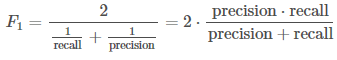
  
다중 클래스 문제의 경우 각 클래스의 F1 점수의 평균을 구해야 합니다. 매크로 F1 점수는 라벨 불균형을 고려하지 않고 각 클래스의 F1 점수의 평균을 구합니다.  
  
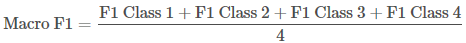
  
즉, 매크로를 사용할 때는 각 레이블의 발생 횟수가 계산에 포함되지 않습니다(반면 "가중치" 점수를 사용할 때는 포함됨). (차이점에 대한 자세한 내용은 [F1 점수에 대한 Scikit-Learn 문서](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.f1_score.html#sklearn.metrics.f1_score) 또는 이 [스택 교환 질문과 답변](https://datascience.stackexchange.com/questions/15989/micro-average-vs-macro-average-performance-in-a-multiclass-classification-settin)을 참조하세요. 성능을 평가하고 싶다면 코드를 사용할 수 있습니다:  
`from sklearn.metrics import f1_score`
`f1_score(y_true, y_predicted, average = 'macro')`
  
이 문제의 경우 레이블이 불균형하기 때문에 평가 지표에 매크로 평균을 사용하는 것이 조금 이상하지만, 이는 주최 측에서 결정한 사항이며 저희가 변경할 수 있는 사항이 아닙니다! 자신의 작업에서 라벨 불균형을 인식하고 그에 따라 지표를 선택하는 것이 좋습니다.
  
### Roadmap
최종 목표는 가구의 빈곤 수준을 예측할 수 있는 머신러닝 모델을 만드는 것입니다. 하지만 모델링에 몰두하기 전에 문제와 데이터를 이해하는 것이 중요합니다. 또한 수많은 모델을 평가한 후 '가장 좋은' 모델을 선택하고, 모델을 구축한 후에는 예측 결과를 조사하고자 합니다. 따라서 우리의 로드맵은 다음과 같습니다:  
  
1. 문제를 이해합니다(이미 거의 다 이해했습니다).
2. 탐색적 데이터 분석
3. 머신 러닝을 위한 데이터 세트 생성을 위한 기능 엔지니어링
4. 여러 기준 머신 러닝 모델 비교
5. 더 복잡한 머신러닝 모델 시도하기
6. 선택한 모델 최적화하기
7. 문제의 맥락에서 모델 예측 조사하기
8. 결론 도출 및 다음 단계 계획
  
위에 설명한 단계는 반복적이기 때문에 한 번에 하나씩 진행하지만, 이전 단계로 돌아가서 일부 결정을 다시 검토할 수도 있습니다. 일반적으로 데이터 과학은 과거의 의사 결정을 지속적으로 평가하고 개선하는 비선형적인 프로세스입니다. 특히 기능 엔지니어링, 모델링 및 최적화는 처음에 제대로 했는지 알 수 없기 때문에 자주 반복하는 단계입니다!  

## Getting Started
We have a pretty good grasp of the problem, so we'll move into the Exploratory Data Analysis (EDA) and feature engineering. For the EDA we'll examine any interesting anomalies, trends, correlations, or patterns that can be used for feature engineering and for modeling. We'll make sure to investigate our data both quantitatively (with statistics) and visually (with figures).  
  
Once we have a good grasp of the data and any potentially useful relationships, we can do some feature engineering (the most important part of the machine learning pipeline) and establish a baseline model. This won't get us to the top of the leaderboard, but it will provide a strong foundation to build on!  
  
With all that info in mind (don't worry if you haven't got all the details), let's get started!  
  
## DeepL 번역
문제를 꽤 잘 파악했으므로 이제 탐색적 데이터 분석(EDA)과 피처 엔지니어링으로 넘어가겠습니다. EDA에서는 피처 엔지니어링과 모델링에 사용할 수 있는 흥미로운 이상 징후, 추세, 상관관계 또는 패턴을 조사할 것입니다. 데이터를 정량적(통계)으로, 그리고 시각적(그림)으로 조사할 것입니다.  
  
데이터와 잠재적으로 유용한 관계를 잘 파악하고 나면 머신 러닝 파이프라인에서 가장 중요한 부분인 피처 엔지니어링을 수행하고 기준 모델을 설정할 수 있습니다. 이렇게 한다고 해서 순위표의 정상에 오를 수는 없지만, 그 위에 구축할 수 있는 강력한 토대를 제공할 수 있습니다!  
  
이 모든 정보를 염두에 두고(모든 세부 사항을 파악하지 못했더라도 걱정하지 마세요) 시작해 봅시다!

### Imports
We'll use a familiar stack of data science libraries: Pandas, numpy, matplotlib, seaborn, and eventually sklearn for modeling.

In [1]:
## Data manipulation
import pandas as pd
import numpy as np

## Visualization
import matplotlib.pyplot as plt
import seaborn as sns

## Set a few plotting defaults
%matplotlib inline
# plt.style.use('fivethirtyeight')
# plt.rcParams['font.size'] = 18
# plt.rcParams['patch.edgecolor'] = 'k'

In [2]:
### Read in Data and Look at Summary information

# pd.options.display.max_columns = 150

## Read in data
train = pd.read_csv('./input/004_costa-rican-household-poverty-prediction/train.csv')
test = pd.read_csv('./input/004_costa-rican-household-poverty-prediction/test.csv')
train.head()

,Id,v2a1,hacdor,rooms,hacapo,v14a,refrig,v18q,v18q1,r4h1,...,SQBescolari,SQBage,SQBhogar_total,SQBedjefe,SQBhogar_nin,SQBovercrowding,SQBdependency,SQBmeaned,agesq,Target
0,ID_279628684,190000.0,0,3,0,1,1,0,NaN,0,...,100,1849,1,100,0,1.000000,0.0,100.0,1849,4
1,ID_f29eb3ddd,135000.0,0,4,0,1,1,1,1.0,0,...,144,4489,1,144,0,1.000000,64.0,144.0,4489,4
2,ID_68de51c94,NaN,0,8,0,1,1,0,NaN,0,...,121,8464,1,0,0,0.250000,64.0,121.0,8464,4
3,ID_d671db89c,180000.0,0,5,0,1,1,1,1.0,0,...,81,289,16,121,4,1.777778,1.0,121.0,289,4
4,ID_d56d6f5f5,180000.0,0,5,0,1,1,1,1.0,0,...,121,1369,16,121,4,1.777778,1.0,121.0,1369,4


In [3]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9557 entries, 0 to 9556
Columns: 143 entries, Id to Target
dtypes: float64(8), int64(130), object(5)
memory usage: 10.4+ MB


In [4]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23856 entries, 0 to 23855
Columns: 142 entries, Id to agesq
dtypes: float64(8), int64(129), object(5)
memory usage: 25.8+ MB


### Integer Columns
Let's look at the distribution of unique values in the integer columns. For each column, we'll count the number of unique values and show the result in a bar plot.

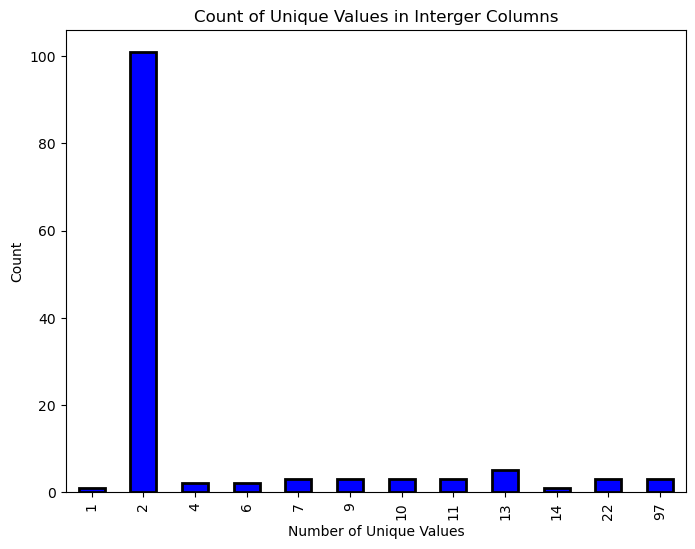

In [5]:
train.select_dtypes(np.int64).nunique().value_counts().sort_index().plot.bar(color='blue', figsize=(8,6), edgecolor='k', linewidth=2)
plt.xlabel('Number of Unique Values')
plt.ylabel('Count')
plt.title('Count of Unique Values in Interger Columns');

The columns with only 2 unique values represent Booleans (0 or 1). In a lot of cases, this boolean information is already on a household level. For example, the refrig column says whether or not the household has a refrigerator. When it comes time to make features from the Boolean columns that are on the household level, we will not need to aggregate these. However, the Boolean columns that are on the individual level will need to be aggregated.  
  
### Float Columns
Another column type is floats which represent continuous variables. We can make a quick distribution plot to show the distribution of all float columns. We'll use an OrderedDict to map the poverty levels to colors because this keeps the keys and values in the same order as we specify (unlike a regular Python dictionary).  
  
The following graphs shows the distributions of the float columns colored by the value of the Target. With these plots, we can see if there is a significant difference in the variable distribution depending on the household poverty level.  
  
### DeepL 번역
고유 값이 2개만 있는 열은 부울(0 또는 1)을 나타냅니다. 대부분의 경우 이 부울 정보는 이미 가구 수준에 있습니다. 예를 들어, 냉장고 열은 가구에 냉장고가 있는지 여부를 나타냅니다. 가구 수준에 있는 부울 열에서 기능을 만들 때는 이러한 정보를 집계할 필요가 없습니다. 그러나 개인 수준의 부울 열은 집계해야 합니다.  
  
### Float Columns
또 다른 열 유형은 연속형 변수를 나타내는 실수 열입니다. 모든 부동형 열의 분포를 보여주기 위해 빠른 분포도를 만들 수 있습니다. 일반 파이썬 딕셔너리와 달리 키와 값이 지정한 순서대로 유지되므로 빈곤 수준을 색상에 매핑하기 위해 OrderedDict를 사용하겠습니다.  
  
다음 그래프는 Target 값에 따라 색상이 지정된 실수 열의 분포를 보여줍니다. 이 그래프를 통해 가구 빈곤 수준에 따라 변수 분포에 유의미한 차이가 있는지 확인할 수 있습니다.

c:\Users\why\miniconda3\envs\study\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\why\miniconda3\envs\study\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\why\miniconda3\envs\study\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\why\miniconda3\envs\study\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to 

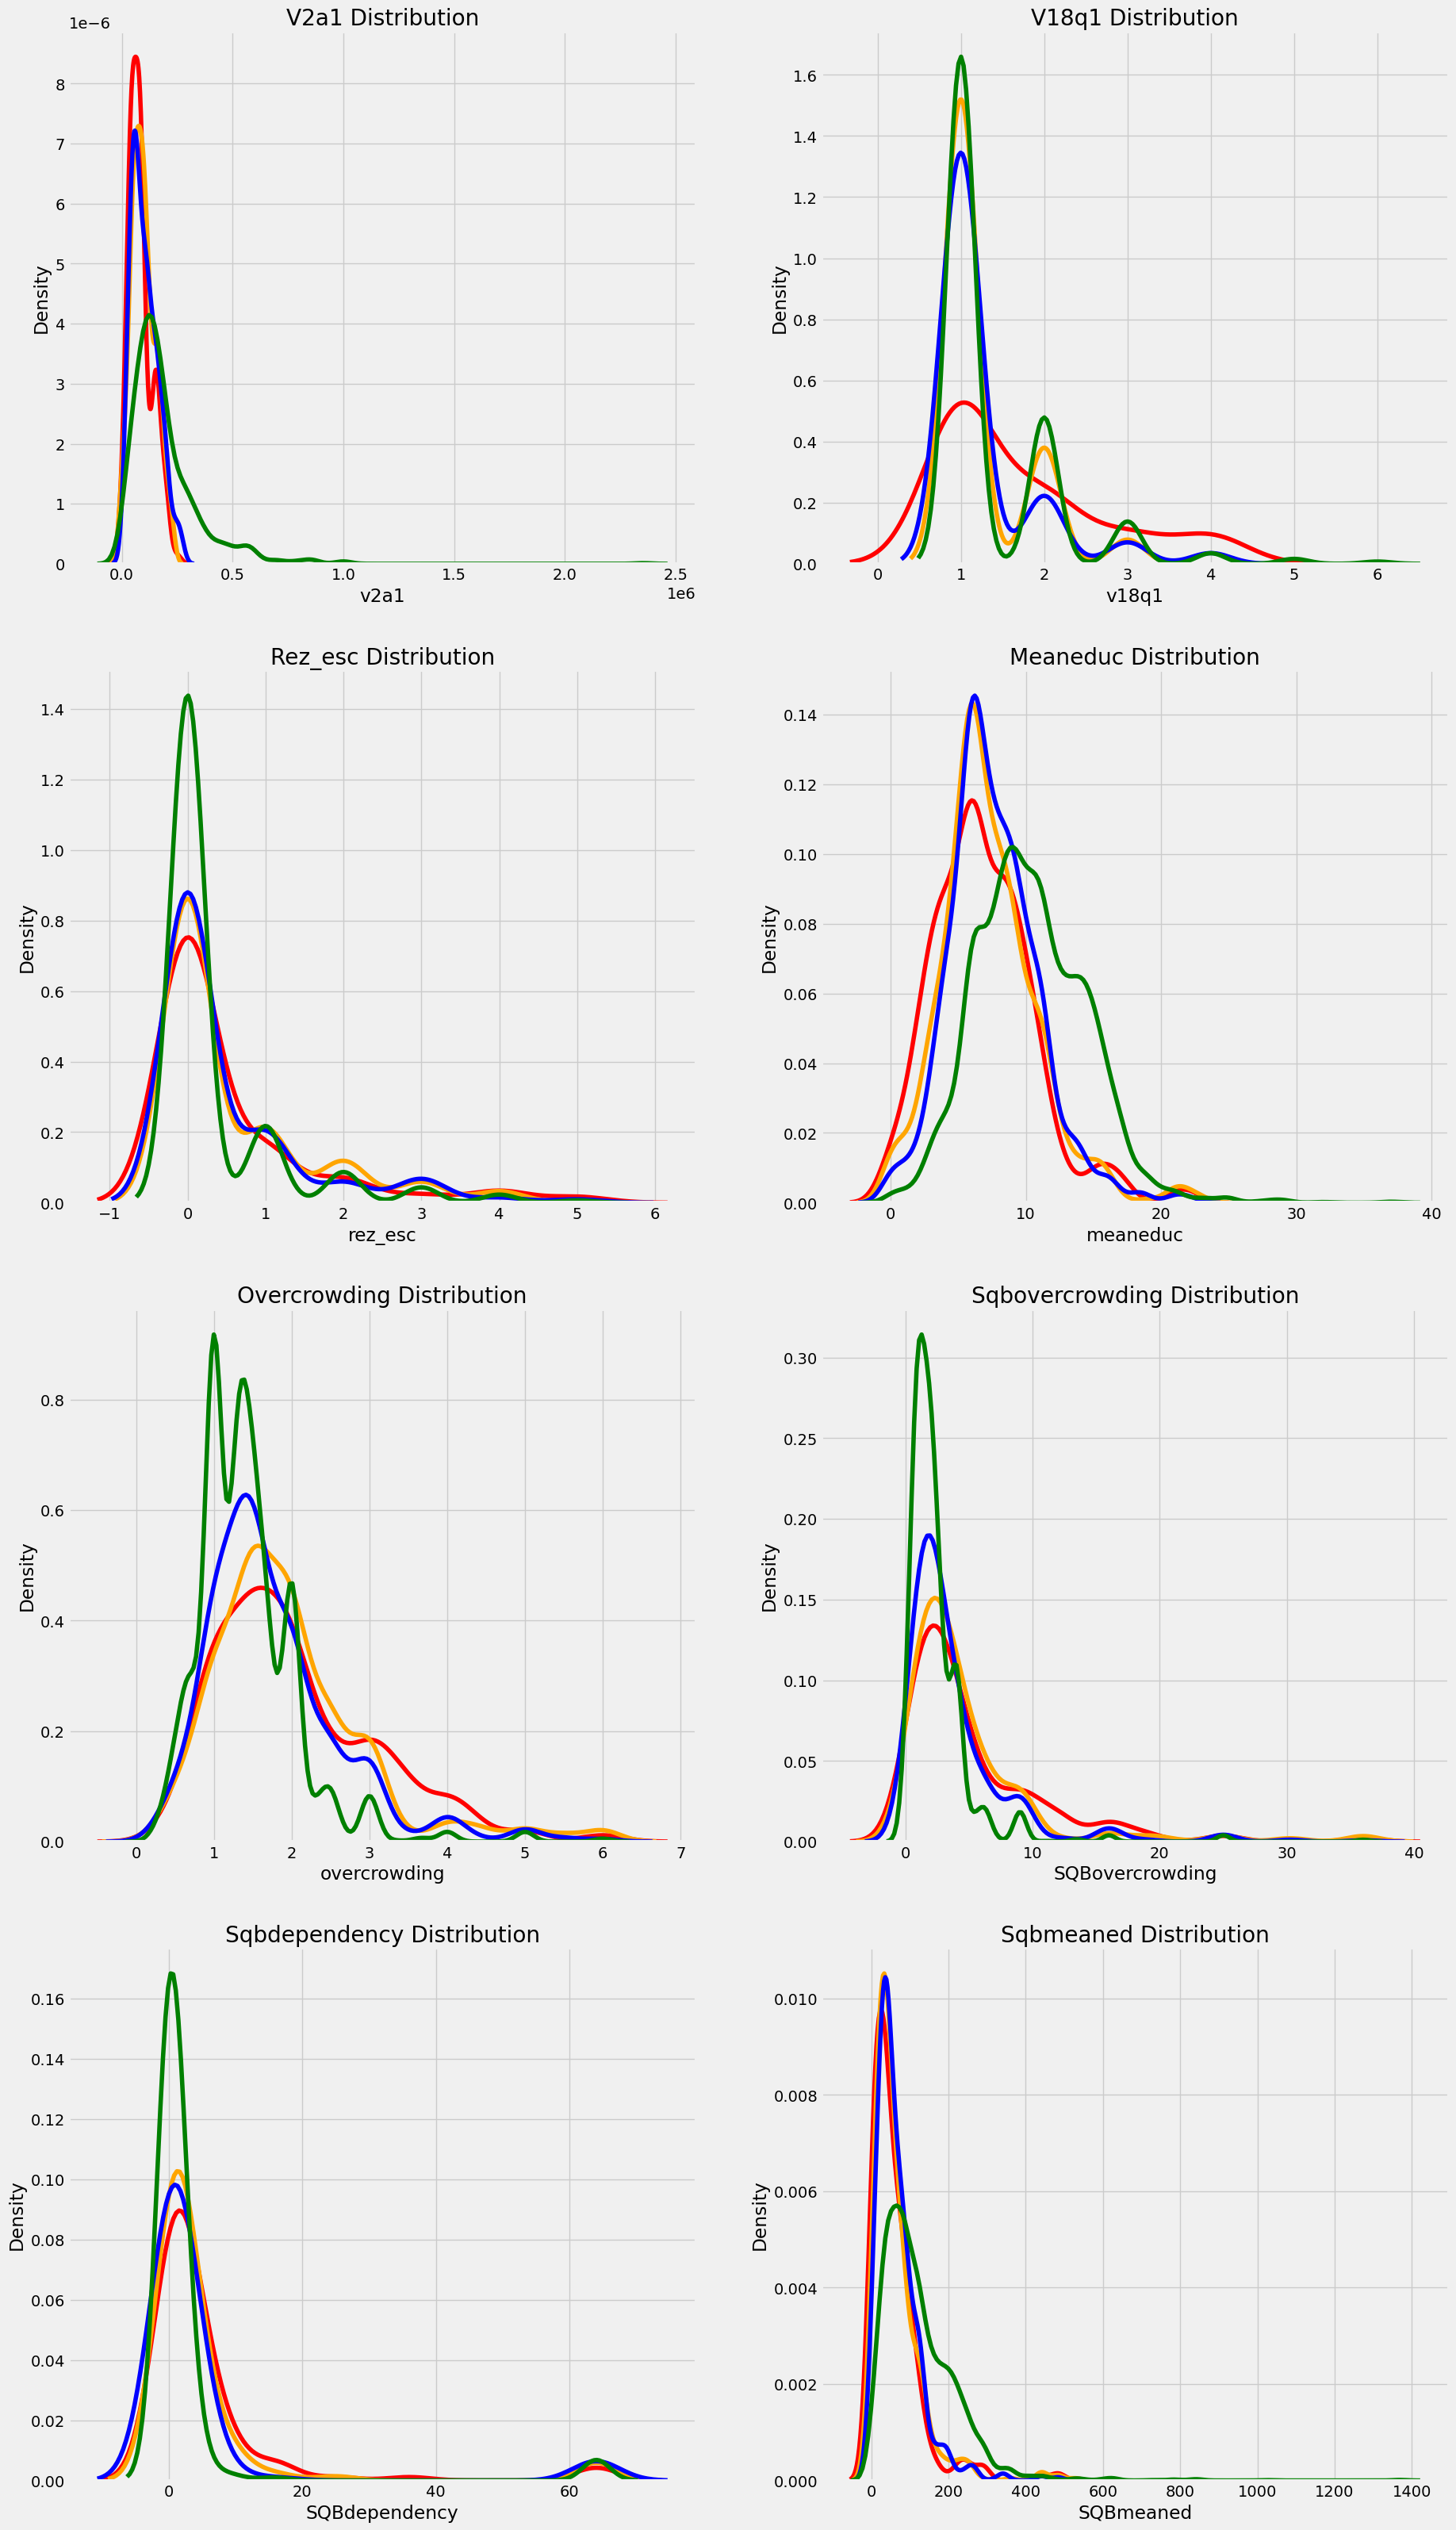

In [13]:
from collections import OrderedDict
# 파이썬 3.6이하에서는 dictionary의 순서가 보장되지 않아 OrderedDict 사용.
# 3.7이상에서도 OrderedDict을 사용함으로써 하위 버전에서 순서를 보장.
# 또한 3.7이상에서도 딕셔너리 간의 동등성 비교할 경우 OrderedDict은 순서 동일까지 검증.

plt.figure(figsize=(20,16))
plt.style.use('fivethirtyeight')

## Color mapping
colors = OrderedDict({1: 'red', 2: 'orange', 3: 'blue', 4: 'green'})
poverty_mapping = OrderedDict({1: 'extreme', 2: 'moderate', 3: 'vulnerable', 4: 'non vulnerable'})

## Iterate through the float columns
for i, col in enumerate(train.select_dtypes('float')):
    ax = plt.subplot(4, 2, i+1)
    ## Iterate through the poverty levels
    for poverty_level, color in colors. items():
        ## Plot each poverty level as a separate line
        sns.kdeplot(train.loc[train['Target']==poverty_level, col].dropna(),
                    ax=ax, color=color, label=poverty_mapping[poverty_level])
    plt.title(f'{col.capitalize()} Distribution')
    plt.xlabel(f'{col}')
    plt.ylabel('Density')
    plt.legend;

plt.subplots_adjust(top=2);

In [12]:
# from collections import OrderedDict

# plt.figure(figsize = (20, 16))
# plt.style.use('fivethirtyeight')

# # Color mapping
# colors = OrderedDict({1: 'red', 2: 'orange', 3: 'blue', 4: 'green'})
# poverty_mapping = OrderedDict({1: 'extreme', 2: 'moderate', 3: 'vulnerable', 4: 'non vulnerable'})

# # Iterate through the float columns
# for i, col in enumerate(train.select_dtypes('float')):
#     ax = plt.subplot(4, 2, i + 1)
#     # Iterate through the poverty levels
#     for poverty_level, color in colors.items():
#         # Plot each poverty level as a separate line
#         sns.kdeplot(train.loc[train['Target'] == poverty_level, col].dropna(), 
#                     ax = ax, color = color, label = poverty_mapping[poverty_level])
        
#     plt.title(f'{col.capitalize()} Distribution'); plt.xlabel(f'{col}'); plt.ylabel('Density')
#     plt.legend()

# plt.subplots_adjust(top = 2)

Later on we'll calculate correlations between the variables and the Target to gauge the relationships between the features, but these plots can already give us a sense of which variables may be most "relevant" to a model. For example, the meaneduc, representing the average education of the adults in the household appears to be related to the poverty level: __a higher average adult education leads to higher values of the target which are less severe levels of poverty.__ The theme of the importance of education is one we will come back to again and again in this notebook!  
  
__DeepL 번역__  
나중에 변수와 대상 간의 상관 관계를 계산하여 기능 간의 관계를 측정할 것이지만, 이 플롯을 통해 어떤 변수가 모델과 가장 '관련성'이 높은지 이미 파악할 수 있습니다. 예를 들어, 가구 내 성인의 평균 학력을 나타내는 평균 학력은 빈곤 수준과 관련이 있는 것으로 보입니다: __성인 평균 교육 수준이 높을수록 빈곤 수준이 덜 심각한 대상의 값이 높아집니다.__ 교육의 중요성에 대한 주제는 이 노트북에서 계속해서 다시 다룰 주제입니다!

https://www.kaggle.com/code/willkoehrsen/a-complete-introduction-and-walkthrough/notebook